In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/"))

import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm
# Any results you write to the current directory are saved as output.
%matplotlib inline

['euclidean-distance-xyz', 'champs-scalar-coupling']


In [2]:
train_df = pd.read_csv('../input/champs-scalar-coupling/train.csv')
test_df = pd.read_csv('../input/champs-scalar-coupling/test.csv')
structure_df = pd.read_csv('../input/champs-scalar-coupling/structures.csv')
with open('../input/euclidean-distance-xyz/X.binaryfile', 'rb') as file_X:
    euclidean_distance = pickle.load(file_X)

In [6]:
test_molecule = test_df['molecule_name'].unique()
test_molecule_set = set(test_molecule)

In [7]:
structure_molecule = structure_df['molecule_name'].unique()
structure_molecule_set = set(structure_molecule)

testデータのmolecule_nameがstructureデータに入っているかどうかの確認

In [8]:
test_molecule_set.issubset(structure_molecule_set)

True

In [9]:
train_df = pd.concat([train_df, pd.DataFrame(euclidean_distance, columns=['euclidean_distance'])], axis=1)

In [10]:
train_df.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,euclidean_distance
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,1.091953
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,1.783120
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,1.783147
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,1.783157
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,1.091952


In [11]:
train_column = train_df.columns
train_column

Index(['id', 'molecule_name', 'atom_index_0', 'atom_index_1', 'type',
       'scalar_coupling_constant', 'euclidean_distance'],
      dtype='object')

In [12]:
type_name = train_df['type'].unique()
type_name

array(['1JHC', '2JHH', '1JHN', '2JHN', '2JHC', '3JHH', '3JHC', '3JHN'],
      dtype=object)

In [13]:
molecule_name = train_df['molecule_name'].unique()
molecule_name

array(['dsgdb9nsd_000001', 'dsgdb9nsd_000002', 'dsgdb9nsd_000003', ...,
       'dsgdb9nsd_133881', 'dsgdb9nsd_133882', 'dsgdb9nsd_133884'],
      dtype=object)

In [14]:
jhc_1 = train_df[train_df['type']==type_name[0]]
jhh_2 = train_df[train_df['type']==type_name[1]]
jhn_1 = train_df[train_df['type']==type_name[2]]
jhn_2 = train_df[train_df['type']==type_name[3]]
jhc_2 = train_df[train_df['type']==type_name[4]]
jhh_3 = train_df[train_df['type']==type_name[5]]
jhc_3 = train_df[train_df['type']==type_name[6]]
jhn_3 = train_df[train_df['type']==type_name[7]]

In [15]:
jhc_1.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,euclidean_distance
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,1.091953
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,1.091952
7,7,dsgdb9nsd_000001,3,0,1JHC,84.8093,1.091946
9,9,dsgdb9nsd_000001,4,0,1JHC,84.8095,1.091948
17,17,dsgdb9nsd_000005,2,0,1JHC,171.2200,1.066598


type別の数

type: 1JHC  number:   709416
type: 2JHH  number:   378036
type: 1JHN  number:    43363
type: 2JHN  number:   119253
type: 2JHC  number:  1140674
type: 3JHH  number:   590611
type: 3JHC  number:  1510379
type: 3JHN  number:   166415


<BarContainer object of 8 artists>

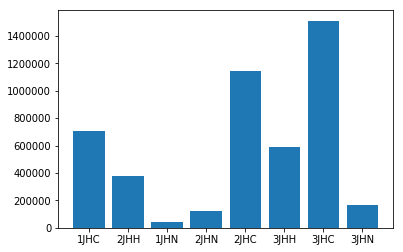

In [30]:
type_num = np.array([jhc_1.shape[0],jhh_2.shape[0],jhn_1.shape[0],jhn_2.shape[0],
                      jhc_2.shape[0],jhh_3.shape[0],jhc_3.shape[0],jhn_3.shape[0]])
for i in range(len(type_num)):
    print("type: {0}  number: {1:8d}".format(type_name[i], type_num[i]))
plt.bar(type_name, type_num)

type別にscalar_coupling_constantのヒストグラムを表示しました。
2JHN, 3JHN　についてはscalar_coupling_constantの値のばらつきはないようです。

(array([2.90000e+01, 9.69800e+03, 1.03678e+05, 3.07220e+04, 1.58100e+04,
        4.35500e+03, 1.60600e+03, 4.24000e+02, 8.50000e+01, 8.00000e+00]),
 array([-3.17241 , -1.758049, -0.343688,  1.070673,  2.485034,  3.899395,
         5.313756,  6.728117,  8.142478,  9.556839, 10.9712  ]),
 <a list of 10 Patch objects>)

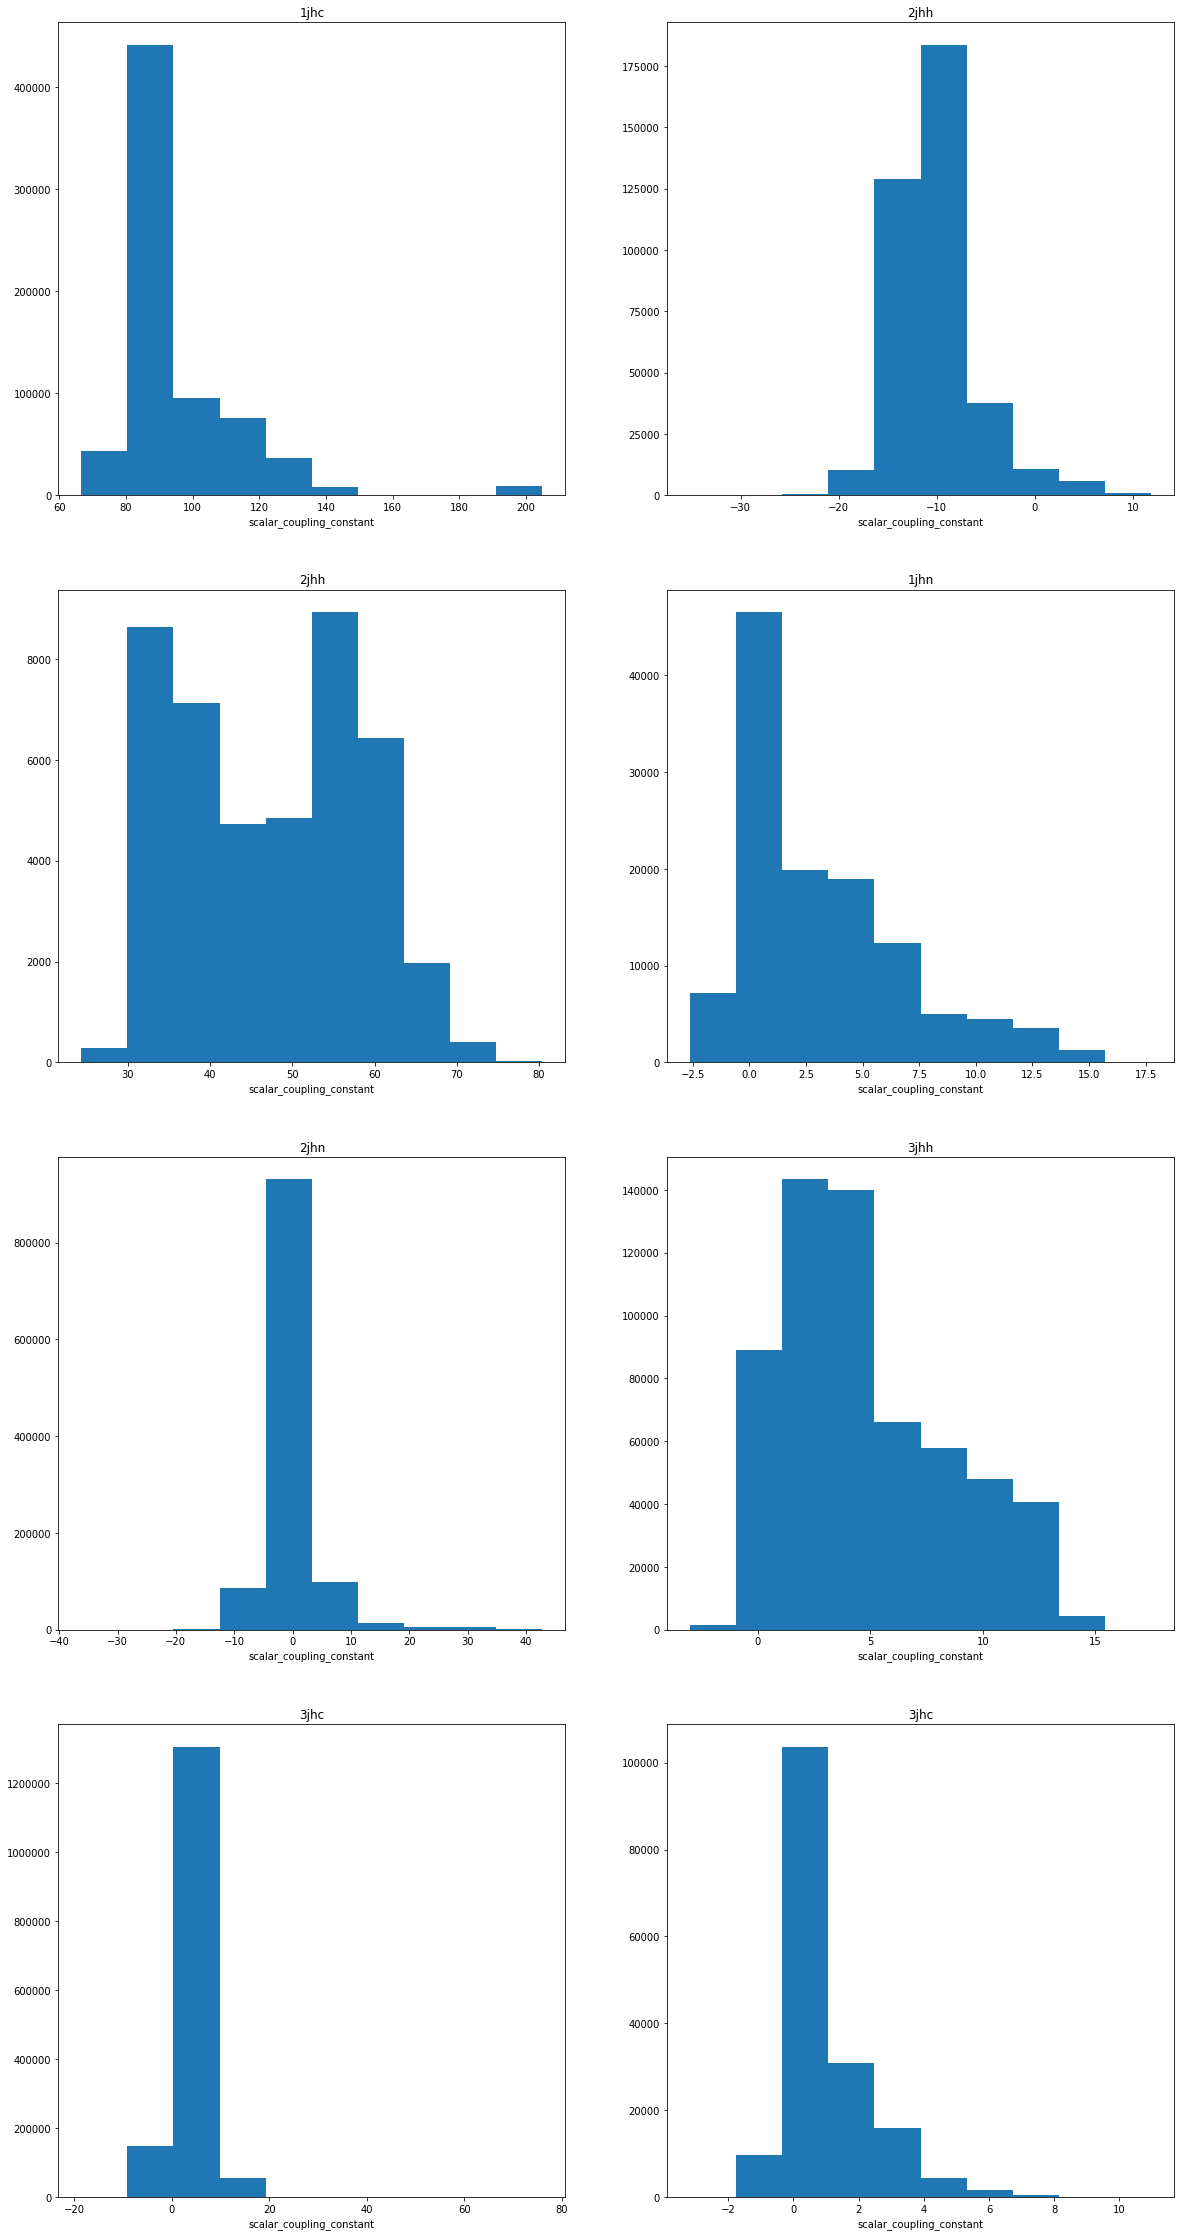

In [17]:
plt.figure(figsize=(20,40))
plt.subplot(4,2,1)
plt.title('1jhc')
plt.xlabel('scalar_coupling_constant')
plt.hist(jhc_1[train_column[5]])
plt.subplot(4,2,2)
plt.title('2jhh')
plt.xlabel('scalar_coupling_constant')
plt.hist(jhh_2[train_column[5]])
plt.subplot(4,2,3)
plt.title('2jhh')
plt.xlabel('scalar_coupling_constant')
plt.hist(jhn_1[train_column[5]])
plt.subplot(4,2,4)
plt.title('1jhn')
plt.xlabel('scalar_coupling_constant')
plt.hist(jhn_2[train_column[5]])
plt.subplot(4,2,5)
plt.title('2jhn')
plt.xlabel('scalar_coupling_constant')
plt.hist(jhc_2[train_column[5]])
plt.subplot(4,2,6)
plt.title('3jhh')
plt.xlabel('scalar_coupling_constant')
plt.hist(jhh_3[train_column[5]])
plt.subplot(4,2,7)
plt.title('3jhc')
plt.xlabel('scalar_coupling_constant')
plt.hist(jhc_3[train_column[5]])
plt.subplot(4,2,8)
plt.title('3jhc')
plt.xlabel('scalar_coupling_constant')
plt.hist(jhn_3[train_column[5]])

euclidean distance(type別に色分け)とscalar_coupling_constantの相関（type別ではなく全体の相関）を表示しました。-0.67ぐらい...

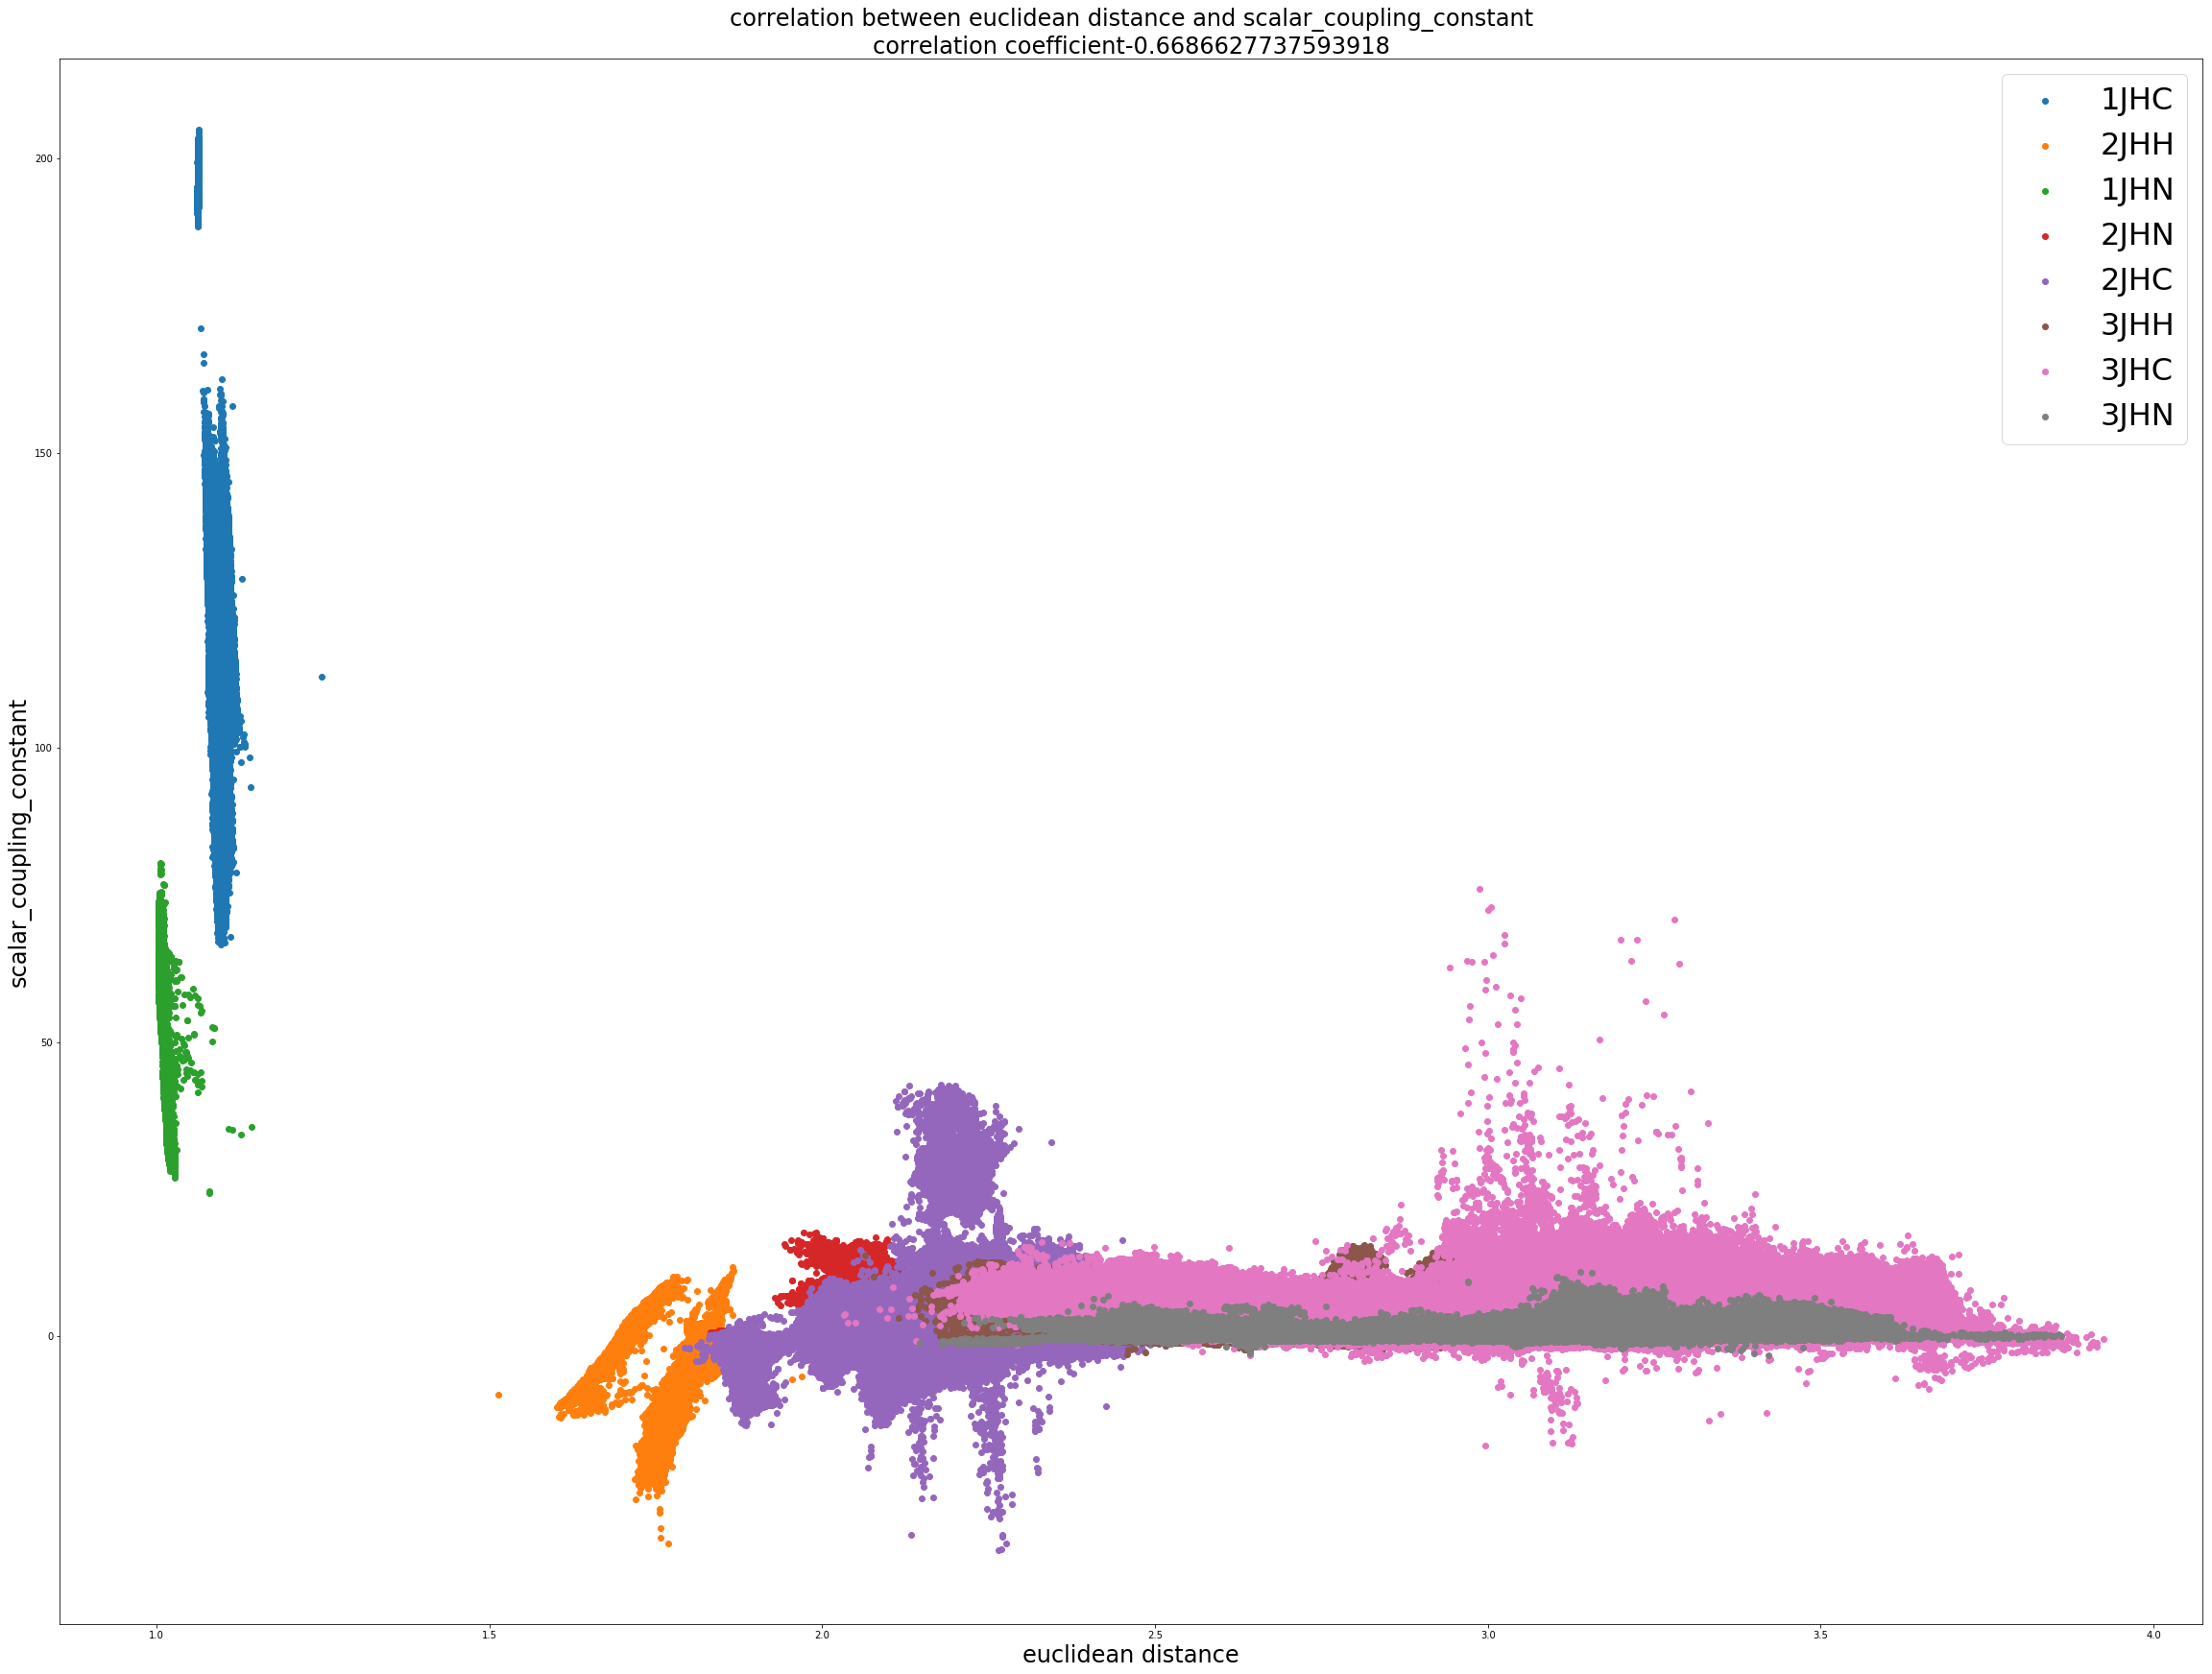

In [32]:
plt.figure(figsize=(40,30))
plt.scatter(jhc_1[train_column[6]],jhc_1[train_column[5]])
plt.scatter(jhh_2[train_column[6]],jhh_2[train_column[5]])
plt.scatter(jhn_1[train_column[6]],jhn_1[train_column[5]])
plt.scatter(jhn_2[train_column[6]],jhn_2[train_column[5]])
plt.scatter(jhc_2[train_column[6]],jhc_2[train_column[5]])
plt.scatter(jhh_3[train_column[6]],jhh_3[train_column[5]])
plt.scatter(jhc_3[train_column[6]],jhc_3[train_column[5]])
plt.scatter(jhn_3[train_column[6]],jhn_3[train_column[5]])
plt.title('correlation between euclidean distance and scalar_coupling_constant\ncorrelation coefficient'+
          str(np.corrcoef(train_df[train_column[5]], train_df[train_column[6]])[0][1]),fontsize=24)
plt.xlabel('euclidean distance',fontsize=24)
plt.ylabel('scalar_coupling_constant',fontsize=24)
plt.legend(['1JHC','2JHH','1JHN','2JHN','2JHC','3JHH','3JHC','3JHN'],fontsize=32)

type別のeuclidean distanceとscalar_coupling_constantの相関を表示しました。


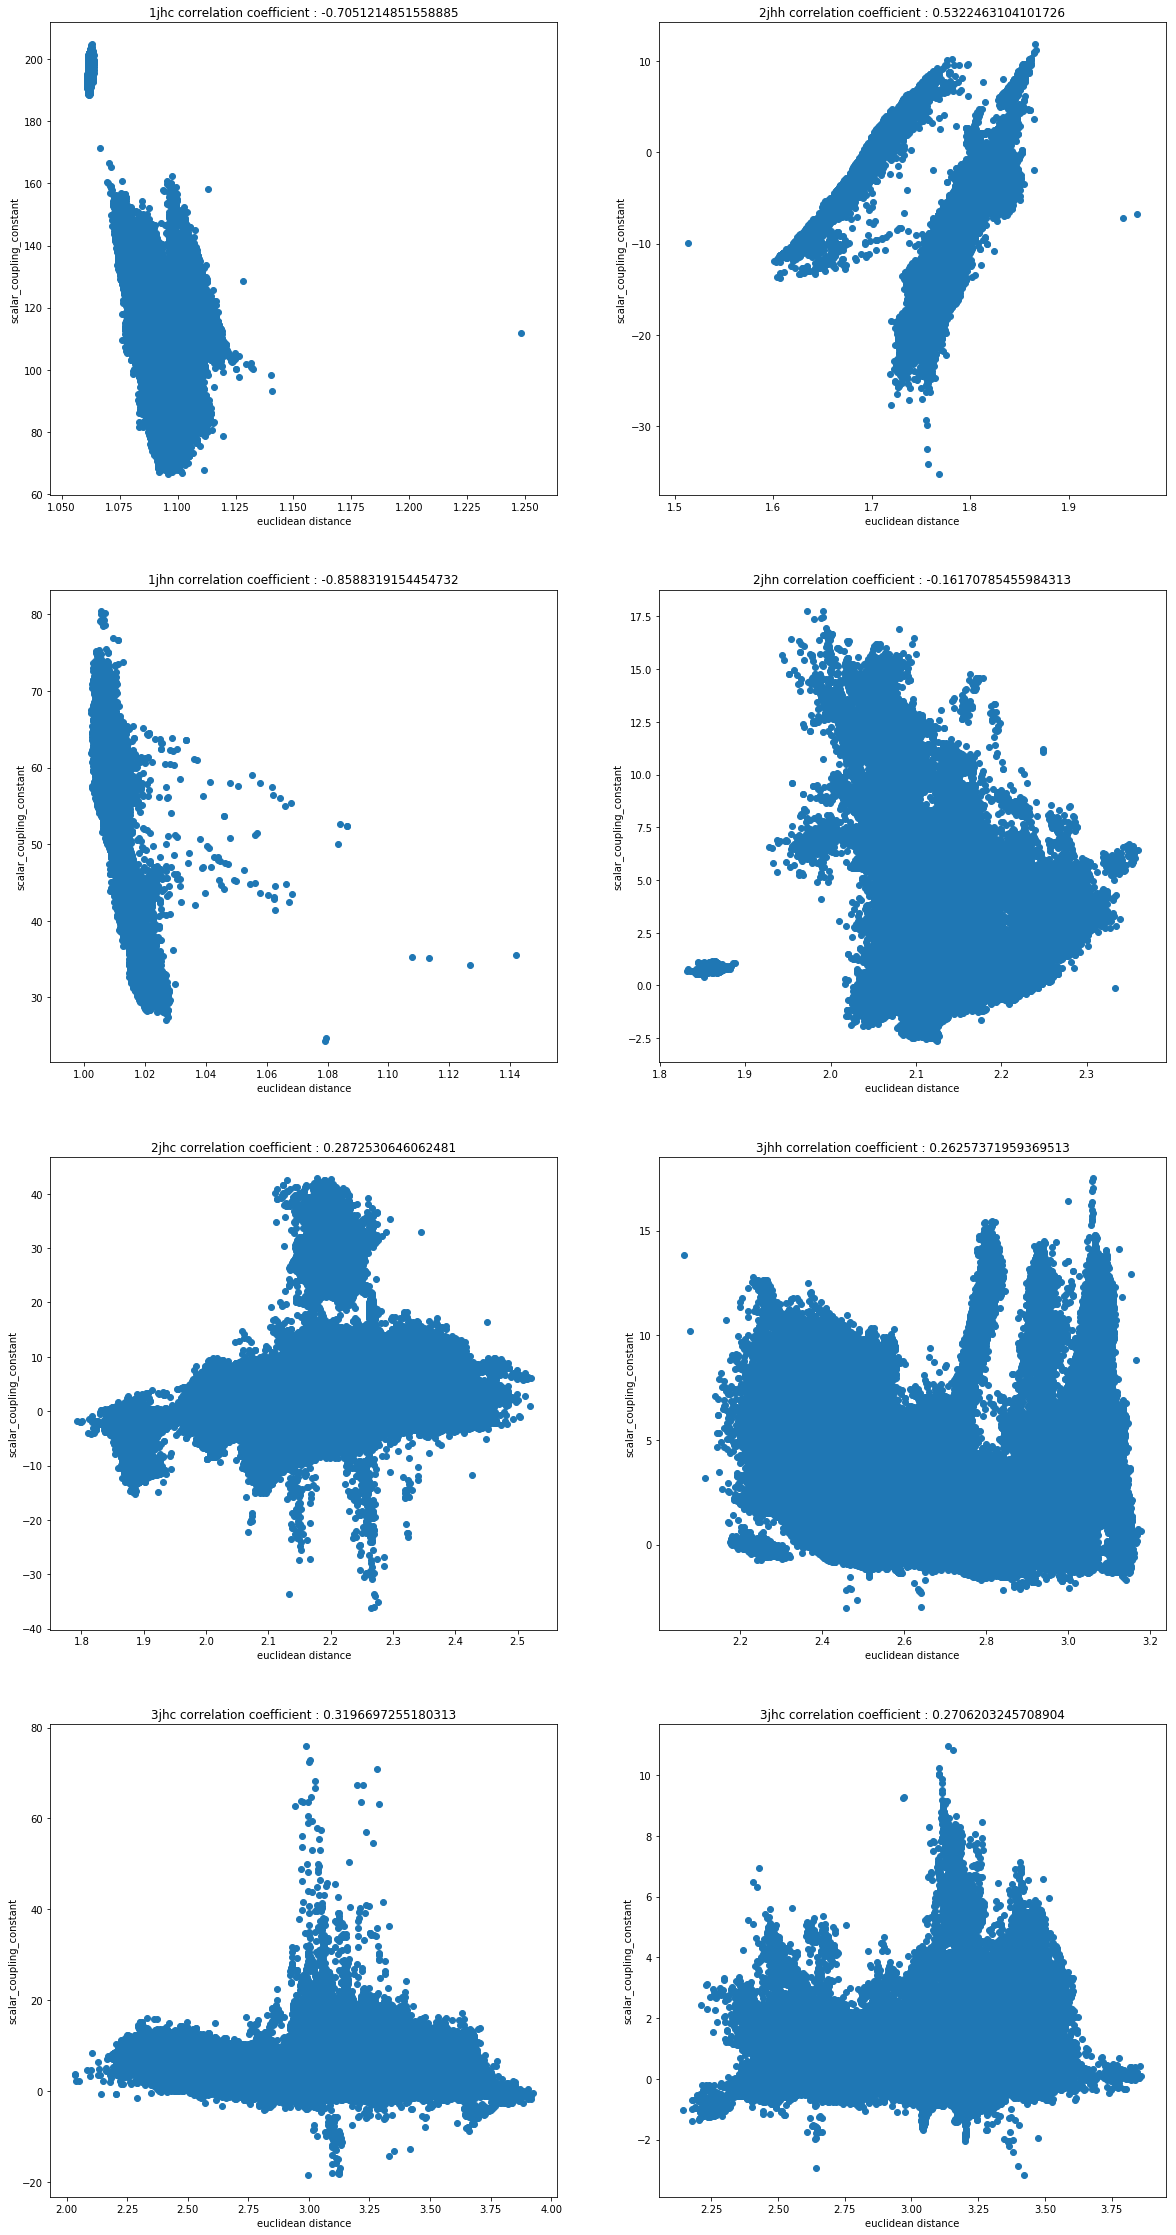

In [31]:
plt.figure(figsize=(20,40))
plt.subplot(4,2,1)
plt.title('1jhc correlation coefficient : '+str(np.corrcoef(jhc_1[train_column[5]], jhc_1[train_column[6]])[0][1]))
plt.xlabel('euclidean distance')
plt.ylabel('scalar_coupling_constant')
plt.scatter(jhc_1[train_column[6]], jhc_1[train_column[5]])
plt.subplot(4,2,2)
plt.title('2jhh correlation coefficient : '+str(np.corrcoef(jhh_2[train_column[5]], jhh_2[train_column[6]])[0][1]))
plt.xlabel('euclidean distance')
plt.ylabel('scalar_coupling_constant')
plt.scatter(jhh_2[train_column[6]], jhh_2[train_column[5]])
plt.subplot(4,2,3)
plt.title('1jhn correlation coefficient : '+str(np.corrcoef(jhn_1[train_column[5]], jhn_1[train_column[6]])[0][1]))
plt.xlabel('euclidean distance')
plt.ylabel('scalar_coupling_constant')
plt.scatter(jhn_1[train_column[6]], jhn_1[train_column[5]])
plt.subplot(4,2,4)
plt.title('2jhn correlation coefficient : '+str(np.corrcoef(jhn_2[train_column[5]], jhn_2[train_column[6]])[0][1]))
plt.xlabel('euclidean distance')
plt.ylabel('scalar_coupling_constant')
plt.scatter(jhn_2[train_column[6]], jhn_2[train_column[5]])
plt.subplot(4,2,5)
plt.title('2jhc correlation coefficient : '+str(np.corrcoef(jhc_2[train_column[5]], jhc_2[train_column[6]])[0][1]))
plt.xlabel('euclidean distance')
plt.ylabel('scalar_coupling_constant')
plt.scatter(jhc_2[train_column[6]], jhc_2[train_column[5]])
plt.subplot(4,2,6)
plt.title('3jhh correlation coefficient : '+str(np.corrcoef(jhh_3[train_column[5]], jhh_3[train_column[6]])[0][1]))
plt.xlabel('euclidean distance')
plt.ylabel('scalar_coupling_constant')
plt.scatter(jhh_3[train_column[6]], jhh_3[train_column[5]])
plt.subplot(4,2,7)
plt.title('3jhc correlation coefficient : '+str(np.corrcoef(jhc_3[train_column[5]], jhc_3[train_column[6]])[0][1]))
plt.xlabel('euclidean distance')
plt.ylabel('scalar_coupling_constant')
plt.scatter(jhc_3[train_column[6]], jhc_3[train_column[5]])
plt.subplot(4,2,8)
plt.title('3jhc correlation coefficient : '+str(np.corrcoef(jhn_3[train_column[5]], jhn_3[train_column[6]])[0][1]))
plt.xlabel('euclidean distance')
plt.ylabel('scalar_coupling_constant')
plt.scatter(jhn_3[train_column[6]], jhn_3[train_column[5]])